In [8]:
from os import environ

environ['optimizer'] = 'Adam'
environ['num_workers']= '2'
environ['batch_size']= str(2048)
environ['n_epochs']= '1000'
environ['batch_norm']= 'True'
environ['loss_func']='MAPE'
environ['layers'] = '700 500 300 150 80'
environ['dropouts'] = '0.3 0.3 0.3 0.3 0.3'
environ['log'] = 'False'
environ['weight_decay'] = '0.01'
environ['cuda_device'] ='cuda:0'
environ['dataset'] = 'data/speedup_dataset2.pkl'

%run utils.ipynb

In [9]:
l = l.load(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}_log_{log}")

In [10]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


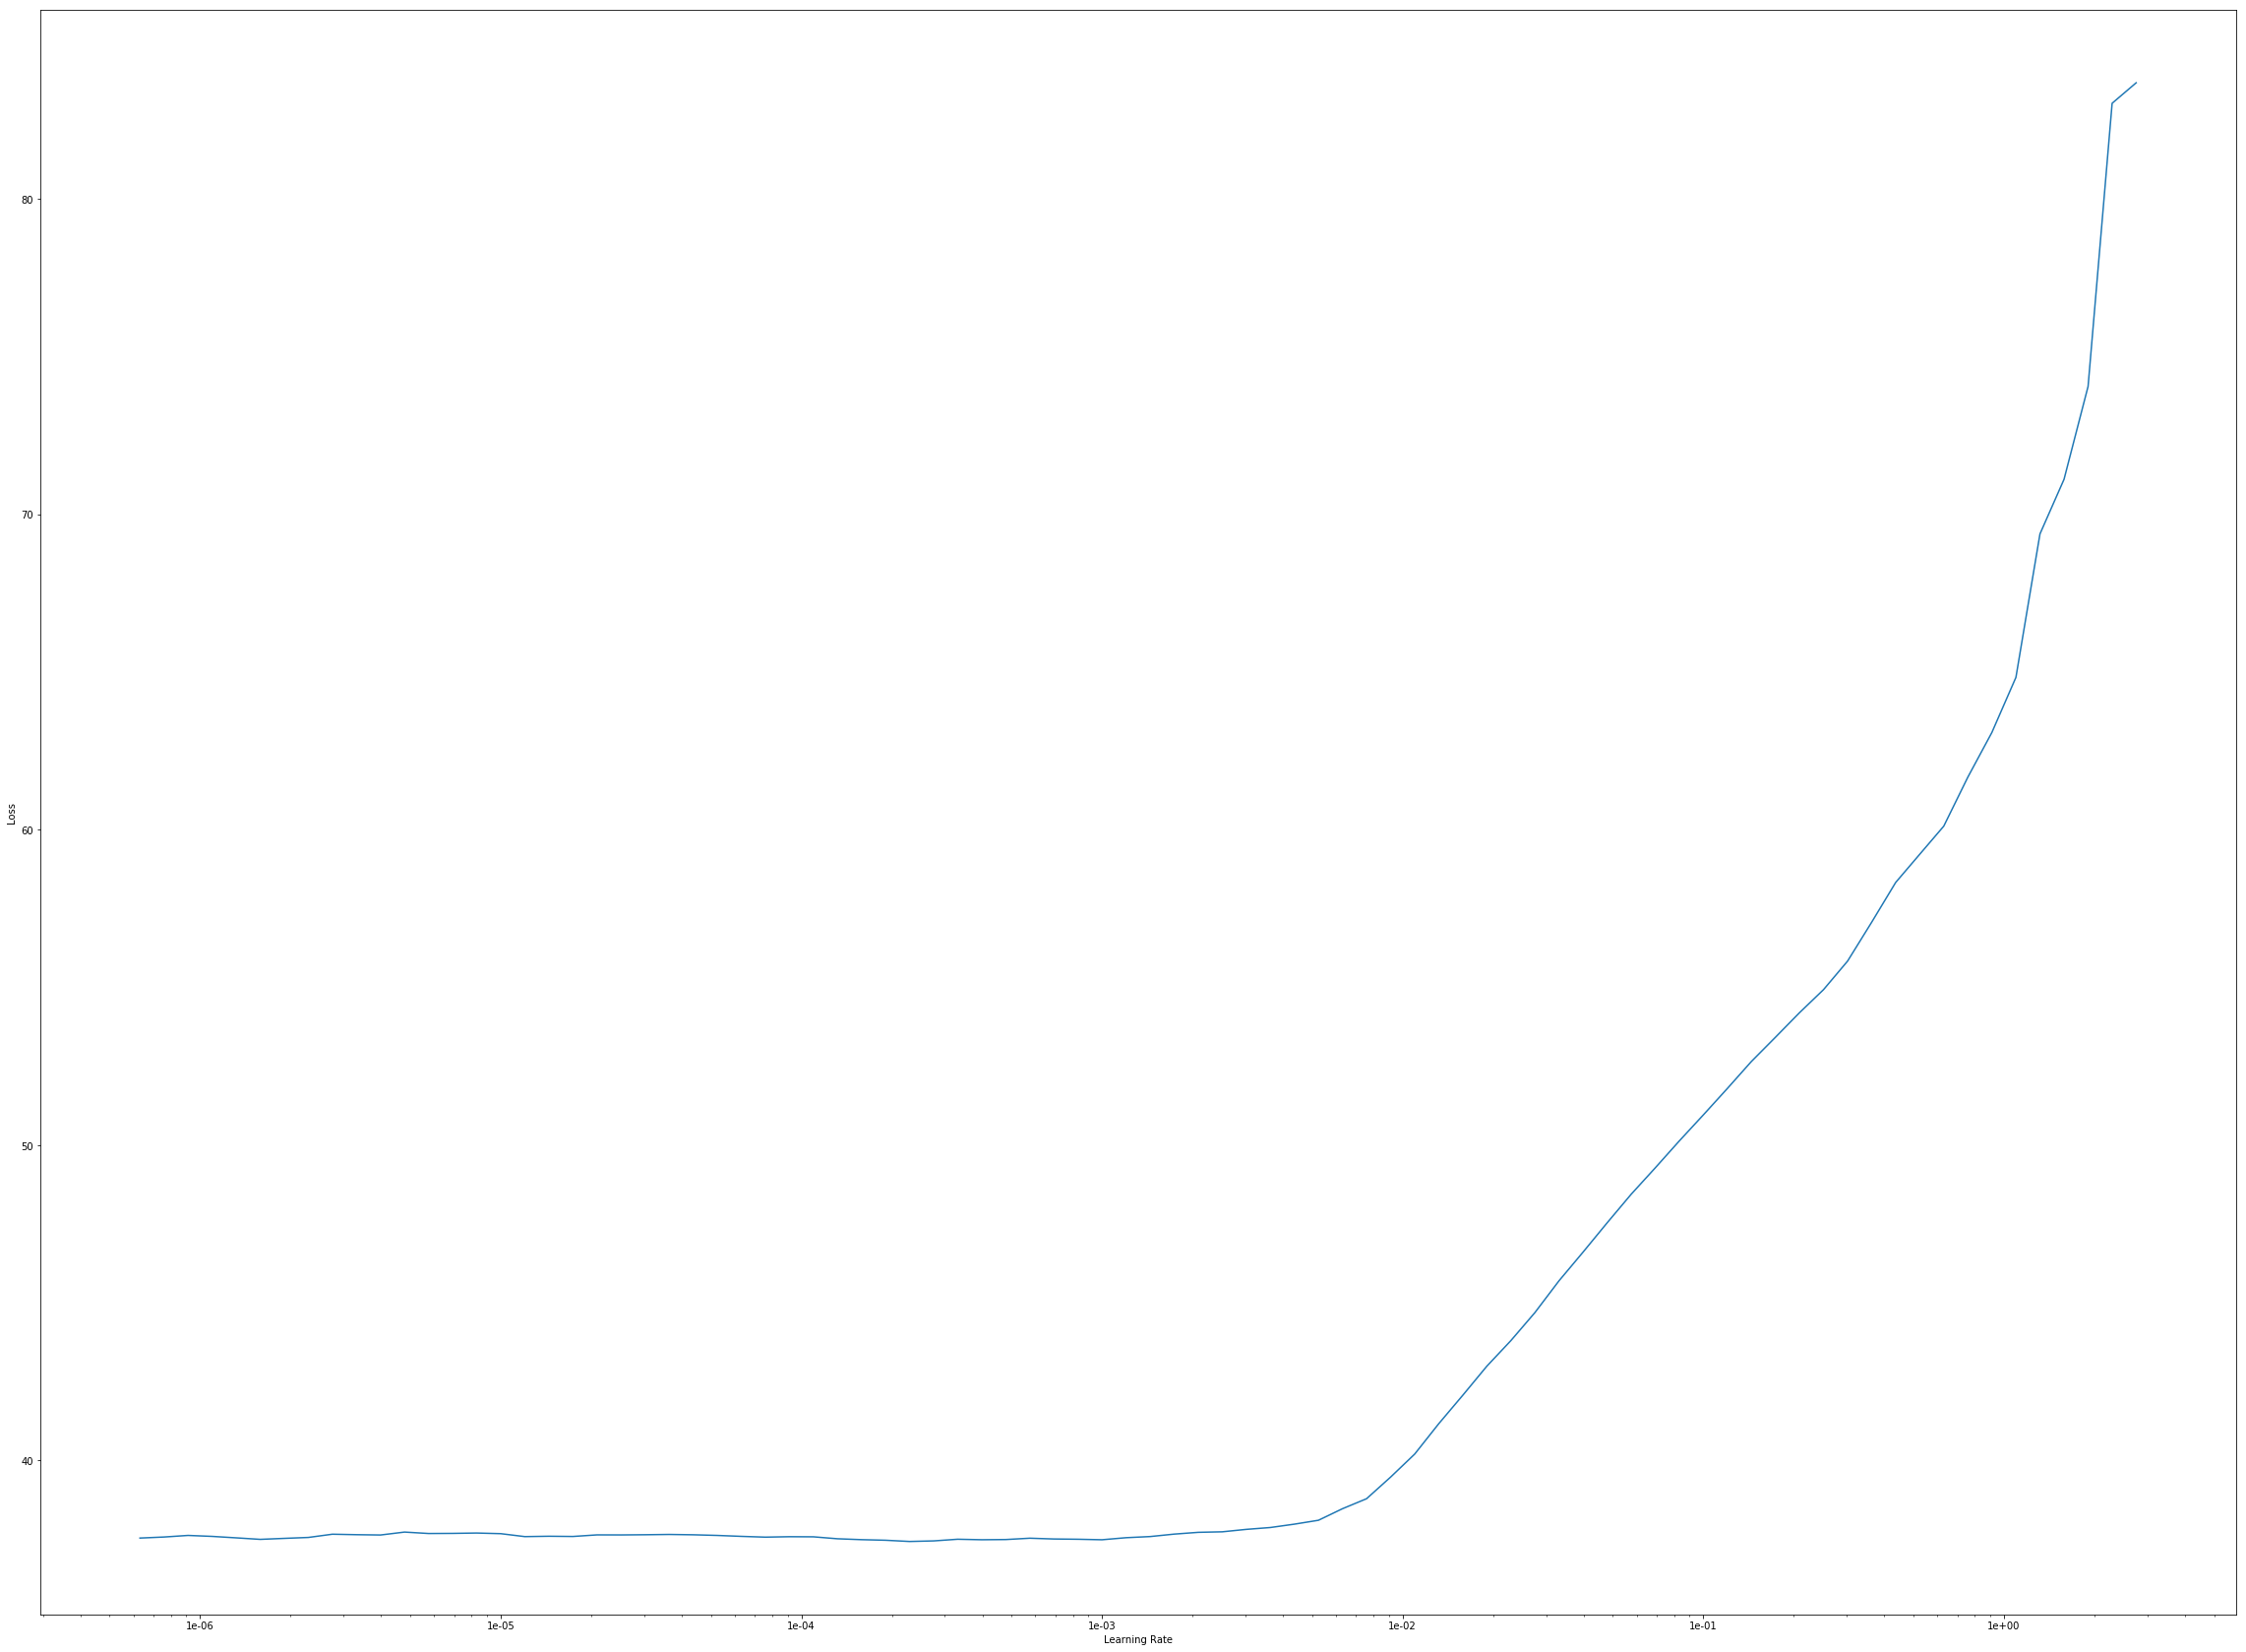

In [11]:
l.recorder.plot()

In [12]:
lr = 1e-04

In [15]:
l.fit_one_cycle(100, lr)

epoch,train_loss,valid_loss,mape_criterion,rmse_criterion
1,36.862446,36.618069,36.618069,0.976499
2,36.864285,36.824207,36.824207,0.982953
3,36.787148,37.148949,37.148949,0.986896
4,36.848694,36.674397,36.674397,0.986162
5,36.852299,36.737545,36.737545,0.980274
6,36.790890,36.589520,36.589520,0.988554
7,36.814468,37.522141,37.522141,0.996368
8,36.793686,37.568211,37.568211,1.001210
9,36.993343,37.539017,37.539017,0.998890
10,36.960827,36.846851,36.846851,0.988472


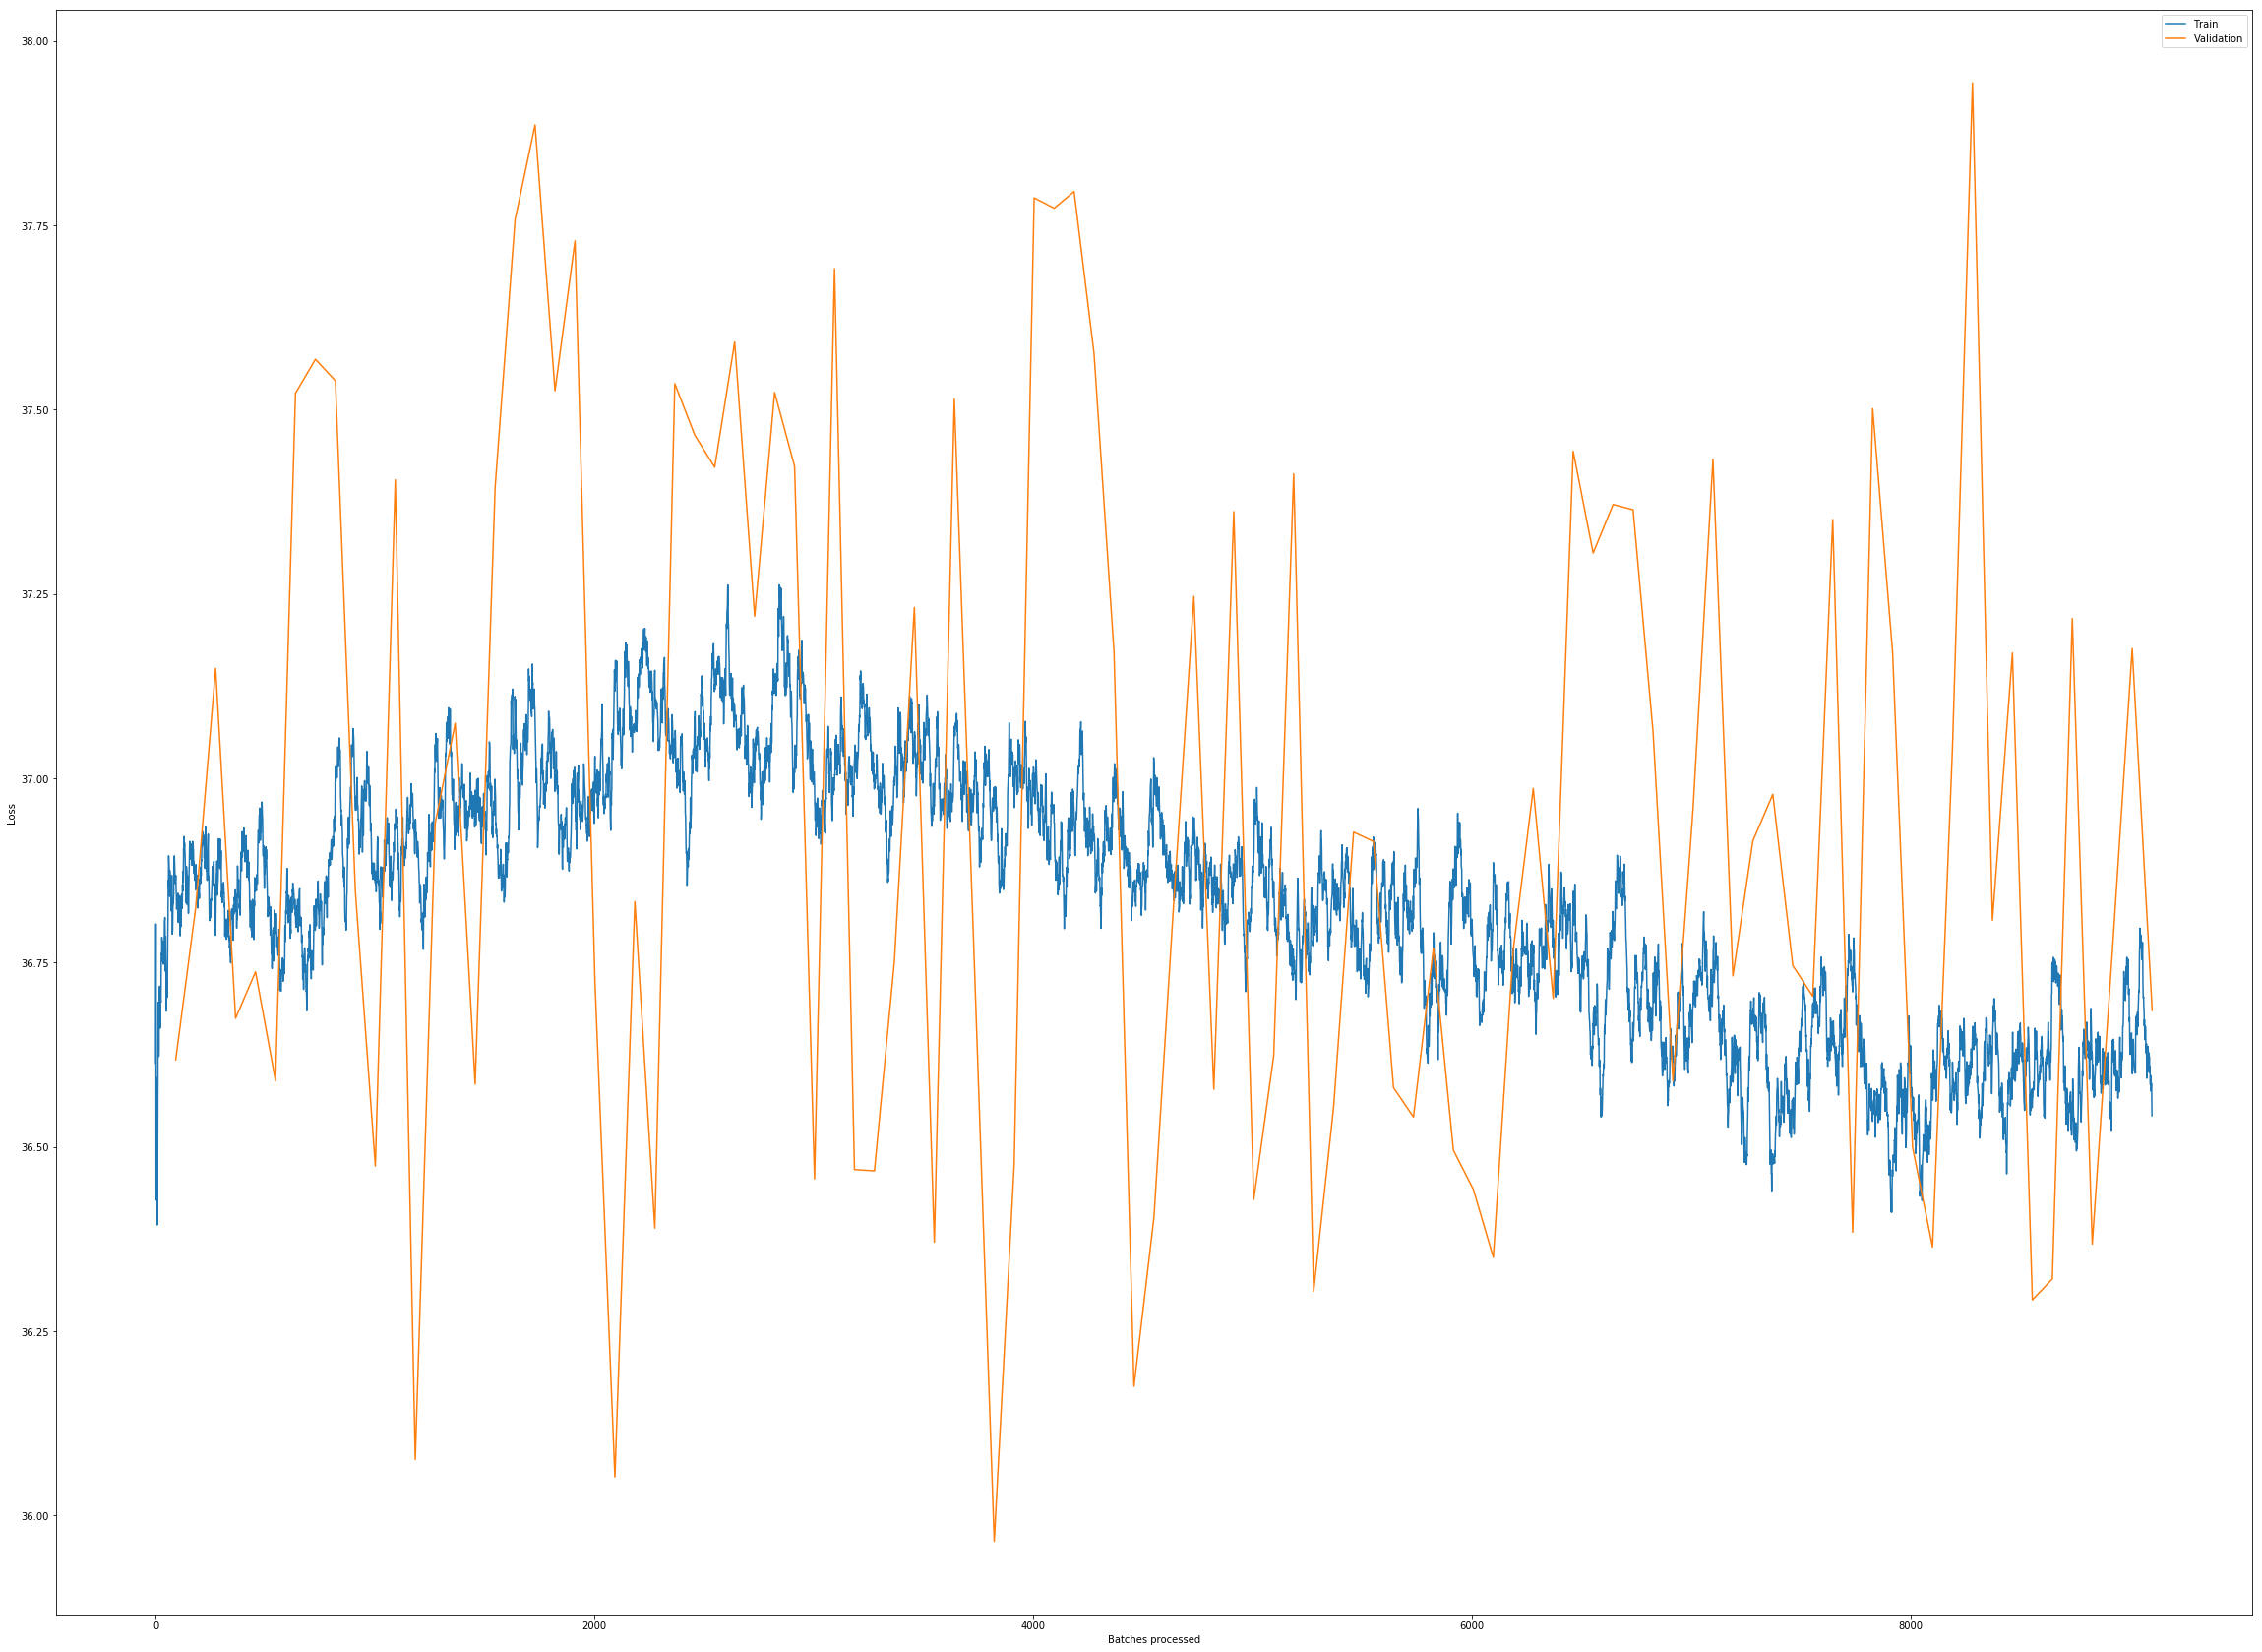

In [16]:
l.recorder.plot_losses()

In [ ]:
l.save(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}_log_{log}")

In [8]:
val_df = get_results_df(val_dl, l.model)
train_df = get_results_df(train_dl, l.model)

In [12]:
df = val_df

In [13]:
df[:][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.400947,1.601825,0.540196,35.693401
std,1.621316,1.653595,0.799416,30.552311
min,0.016203,0.010685,0.000028,0.002874
25%,0.186082,0.301894,0.057695,10.724161
50%,0.699095,0.970127,0.233343,26.566598
75%,1.799923,2.176448,0.684116,60.757775
max,6.642506,7.522550,6.141881,497.612854


In [21]:
df[:][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.167341,1.601825,0.622120,38.655998
std,1.265959,1.653595,0.885392,30.146193
min,0.019654,0.010685,0.000007,0.000128
25%,0.181011,0.301894,0.067356,14.126900
50%,0.706342,0.970127,0.240878,32.381136
75%,1.791752,2.176448,0.775789,61.376414
max,5.607151,7.522550,6.111461,434.676086


In [18]:
df[(df.interchange + df.tile + df.unroll != 0)][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,185104.000000,185104.000000,1.851040e+05,185104.000000
mean,0.712503,1.185355,5.312251e-01,41.155712
std,0.931675,1.616282,9.678349e-01,33.420567
min,0.017939,0.008491,5.215406e-07,0.000362
25%,0.131847,0.210773,4.546655e-02,14.744671
50%,0.275573,0.562228,1.644770e-01,35.262035
75%,0.983084,1.398968,5.691903e-01,64.760616
max,5.705382,16.089287,1.604441e+01,683.149475


/data/scratch/henni-mohammed/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


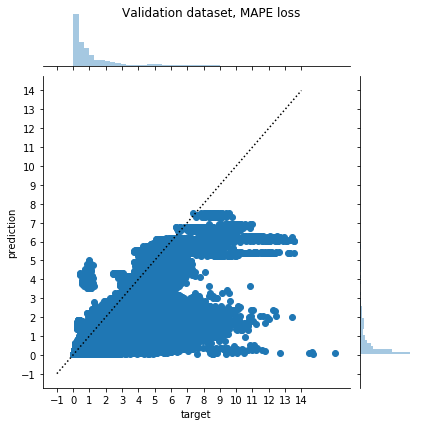

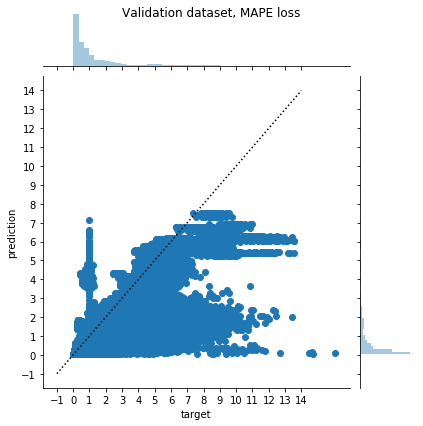

In [11]:
df1 = df[(df.interchange + df.tile + df.unroll != 0)]
joint_plot(df1, f"Validation dataset, {loss_func} loss")
df2 = df
joint_plot(df2, f"Validation dataset, {loss_func} loss")